In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image

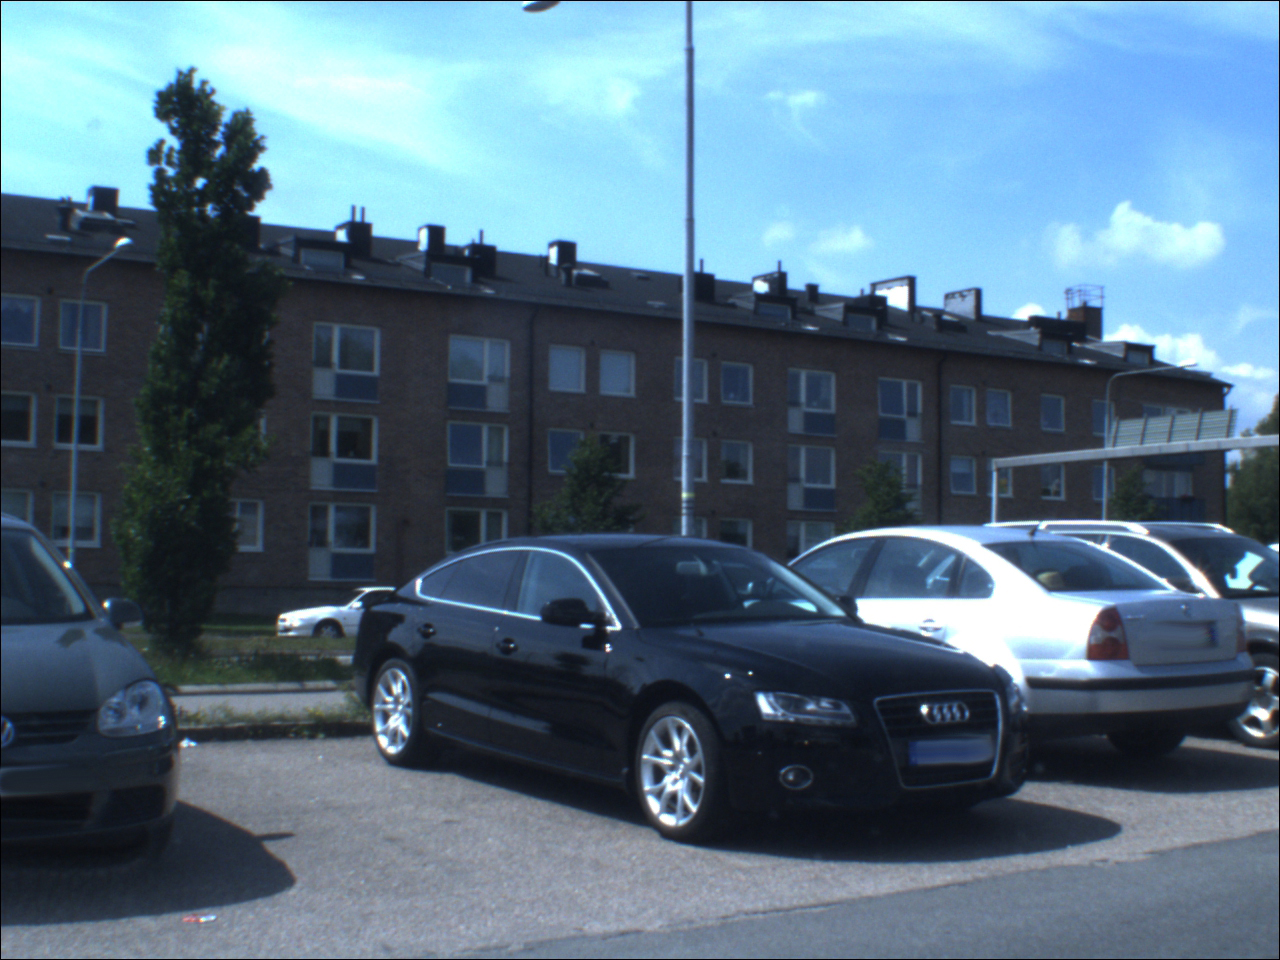

In [3]:
file_path = 'C:\\Users\\Tseh\\Documents\\YOLO\\swedish_signs\\1277381619Image000001.jpg'
img = Image.open(file_path)
display(img)

In [8]:
file_path = 'C:\\Users\\Tseh\\Documents\\YOLO\\annotations_1.txt'
with open(file_path, 'r') as file:
    contents = file.read()

In [16]:
import os
from PIL import Image, ImageDraw

# Function to draw annotations on an image
def draw_annotations(image_path, annotation_data):
    # Open the image
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)
    
    # Split the annotation data by lines
    annotations = annotation_data.split('\n')
    
    # Process each annotation line
    for annotation in annotations:
        # Skip empty lines or lines without enough parts
        if annotation.strip() == '' or len(annotation.split(',')) < 6:
            continue
        
        # Split the annotation by commas
        parts = annotation.split(',')
        
        # Extract annotation information
        image_name = parts[0].split(':')[0].strip()  # Extract the image file name
        if image_name in image_path:
            visibility = parts[1].strip()
            coordinates = parts[2:6]
            
            # Check if the coordinates can be converted to floats
            try:
                x1, y1, x2, y2 = map(float, coordinates)  # Bounding box coordinates
            except ValueError:
                continue  # Skip this annotation if conversion fails
            
            label = ','.join(parts[6:]).strip()  # Join the remaining parts as label
            
            # Draw bounding box and label if the image name matches
            if visibility == 'VISIBLE':  # Consider visible signs only (you can adjust this condition)
                draw.rectangle([(x1, y1), (x2, y2)], outline='red')  # Draw bounding box
                draw.text((x1, y1 - 12), label, fill='red')  # Add label
    
    # Save the image with annotations
    output_path = os.path.splitext(image_path)[0] + '_annotated.jpg'
    img.save(output_path)

# Path to the directory containing images
images_directory = 'C:\\Users\\Tseh\\Documents\\YOLO\\swedish_signs'

# Path to the annotations file
annotations_path = 'C:\\Users\\Tseh\\Documents\\YOLO\\annotations.txt'

# Read the contents of the annotations file
with open(annotations_path, 'r') as file:
    annotation_data = file.read()

# List all files in the images directory
image_files = os.listdir(images_directory)

# Iterate through the image files
for image_file in image_files:
    # Check if the file is an image (you can add more specific image format checks if needed)
    if image_file.endswith('.jpg') or image_file.endswith('.jpeg') or image_file.endswith('.png'):
        image_path = os.path.join(images_directory, image_file)
        
        # Apply annotations to each image
        draw_annotations(image_path, annotation_data)